In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
#======================================================[Preprocessing]----
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import preprocessing
#======================================================[MODELS]-----
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
#====================================================[Evaluation]
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

import warnings
warnings.filterwarnings("ignore")

In [84]:
df = pd.read_csv("/content/heart.csv")

In [85]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [86]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
hestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: to diagnose prediabetes, diabetes [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results اختبار غير جراحي يمكنه الكشف عن التشوهات بما في ذلك عدم انتظام ضربات القلب، والأدلة على مرض القلب التاجي، وتضخم البطين الأيسر، وكتل الفروع الحزيمية

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: pain in the chest that comes on with exercise [Y: Yes, N: No]

Oldpeak:ST[Numeric value measured in depression]indicate health conditions such as hypokalemiaنقص بوتاسيوم, myocardial ischemiaنقص ترويه الدم

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [88]:
df.shape

(918, 12)

In [89]:
info_columns={'Name':[], 'Data_Type':[], 'Null_Values':[], 'Num_of_unique':[], 'Unique_Values':[]}
def info_col(col):
    info_columns['Name'].append(col.name)
    info_columns['Data_Type'].append(col.dtype)
    info_columns['Null_Values'].append(col.isnull().sum())
    info_columns['Num_of_unique'].append(col.nunique())
    if col.nunique() < 10:
      info_columns['Unique_Values'].append(col.unique())
    else:
      info_columns['Unique_Values'].append('More than 10')


In [90]:
for col in df.columns:
    info_col(df[col])
info_columns=pd.DataFrame(info_columns)
info_columns

,Name,Data_Type,Null_Values,Num_of_unique,Unique_Values
0,Age,int64,0,50,More than 10
1,Sex,object,0,2,"[M, F]"
2,ChestPainType,object,0,4,"[ATA, NAP, ASY, TA]"
3,RestingBP,int64,0,67,More than 10
4,Cholesterol,int64,0,222,More than 10
5,FastingBS,int64,0,2,"[0, 1]"
6,RestingECG,object,0,3,"[Normal, ST, LVH]"
7,MaxHR,int64,0,119,More than 10
8,ExerciseAngina,object,0,2,"[N, Y]"
9,Oldpeak,float64,0,53,More than 10


In [91]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [92]:
df.duplicated().sum()

0

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [94]:
df.describe(include = 'O').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [95]:
df['FastingBS']=df['FastingBS'].astype('object')
cat_features=df.select_dtypes(include='object').columns
cat_features

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope'],
      dtype='object')

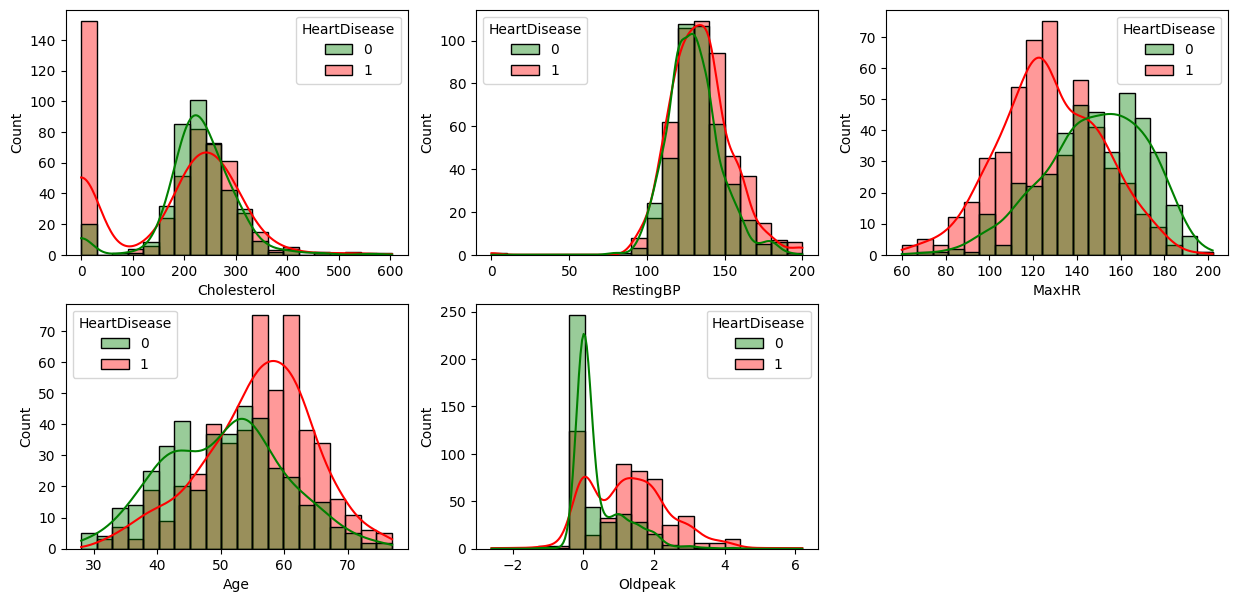

In [96]:
num_coulmn=['Cholesterol','RestingBP','MaxHR','Age','Oldpeak']
plt.figure(figsize=(15,7))
for i,col in enumerate(num_coulmn):
     plt.subplot(2,3,i+1)
     hist=sns.histplot(data=df, x=col, hue='HeartDisease', kde=True,bins=20,palette=['green','red'],alpha=0.4)

plt.show()

Handle outlier

In [97]:
df=df[df['Cholesterol']<550]
df.shape

(916, 12)

In [98]:
df=df[df['RestingBP']>=80]

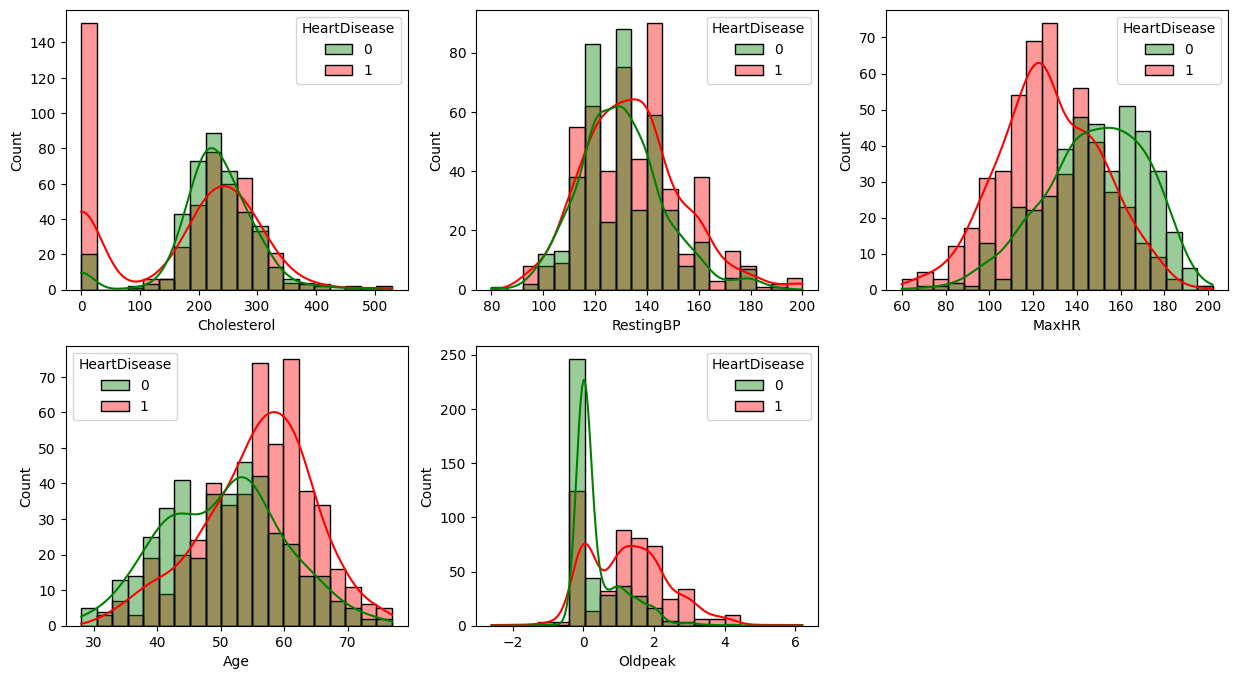

In [101]:
plt.figure(figsize=(15,8))
for i,col in enumerate(num_coulmn):
     plt.subplot(2,3,i+1)
     hist=sns.histplot(data=df, x=col, hue='HeartDisease', kde=True,bins=20,palette=['green','red'],alpha=0.4)

plt.show()

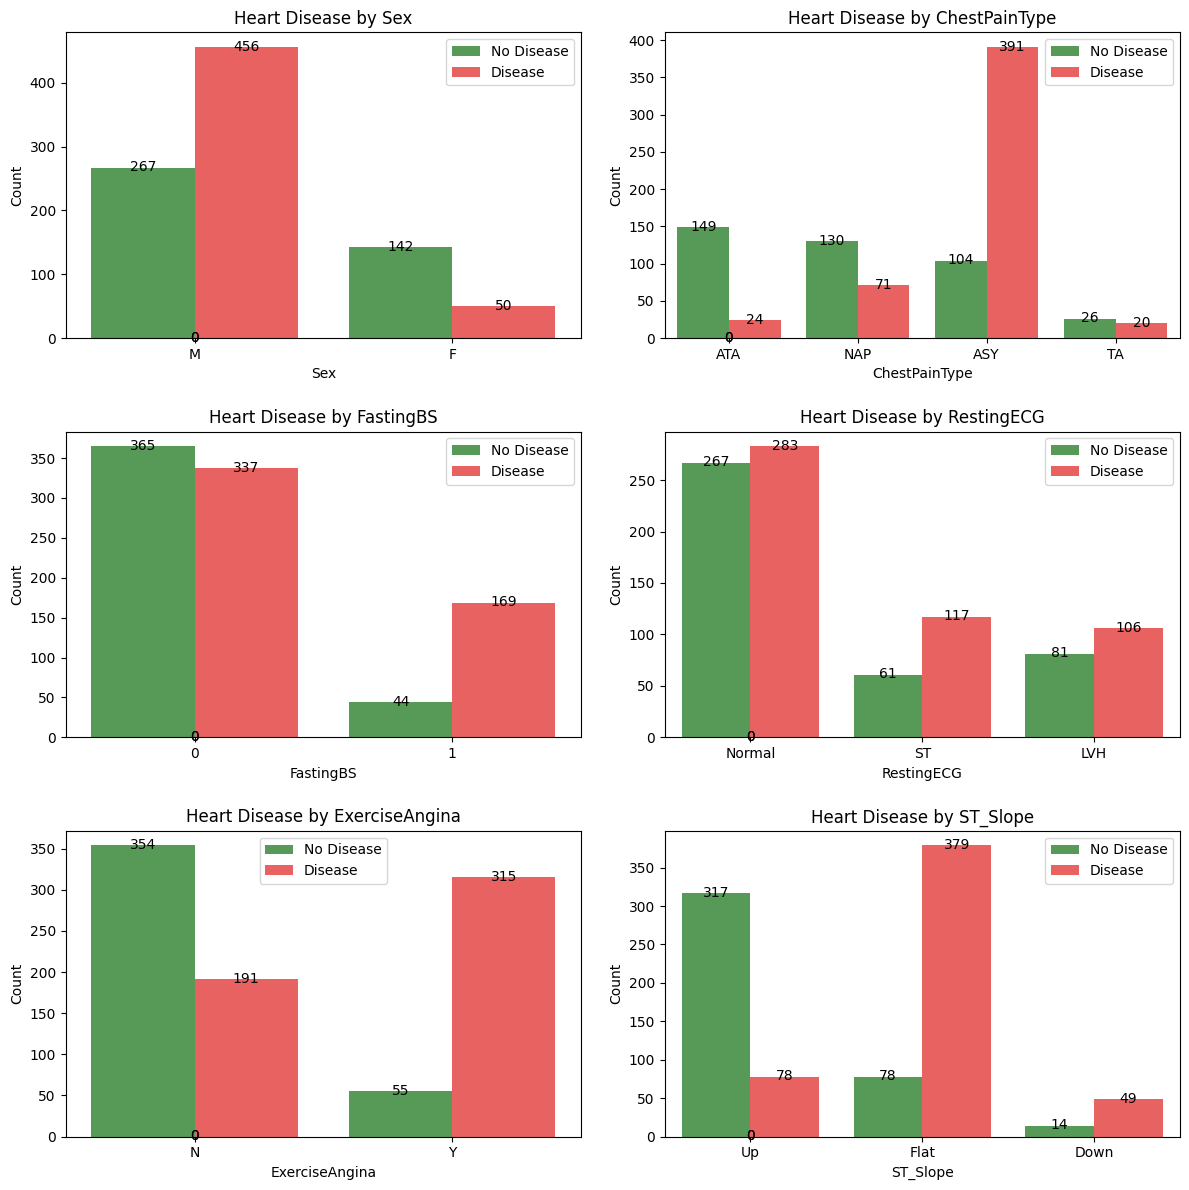

In [102]:
plt.figure(figsize=(12,12))
for i,col in enumerate(cat_features):
    plt.subplot(3,2,i+1)
    sns.countplot(data = df ,x = col, hue = 'HeartDisease',palette=['green','red'],alpha=.7)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Heart Disease by {col}')
    plt.legend(['No Disease','Disease'])


plt.tight_layout(w_pad=2,h_pad=2)
plt.show()

In [103]:
df['FastingBS']=df['FastingBS'].astype('int')

In [104]:
cat_features=df.select_dtypes(include='object').columns
cat_features

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

**Encoding**

In [105]:
for col in cat_features:
  if df[col].nunique() == 2:
    if col=='Sex':
      df[col]=df[col].map({'M':1,'F':0})
    else:
      df[col]=df[col].map({'N':0,'Y':1})
  else:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    #pkl.dump(le,open(f'{col}_le.pkl','wb'))


df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


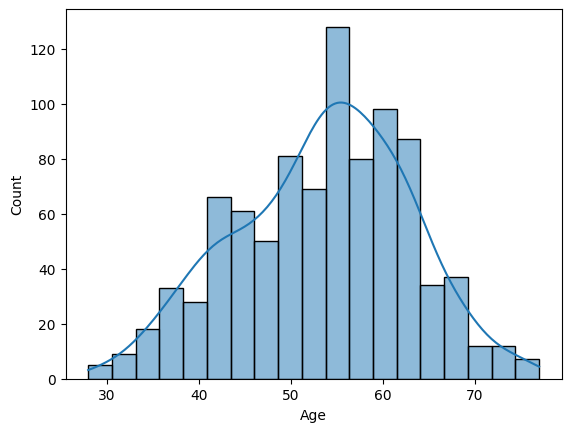

In [106]:
sns.histplot(df['Age'],kde=True)
plt.show()

In [107]:
df['Age'] = pd.qcut(df['Age'], 10, labels=False)

In [108]:
df['Age'].value_counts().sort_index()

,count
Age,
0,93
1,103
2,95
3,96
4,83
5,116
6,77
7,98
8,73


<Axes: >

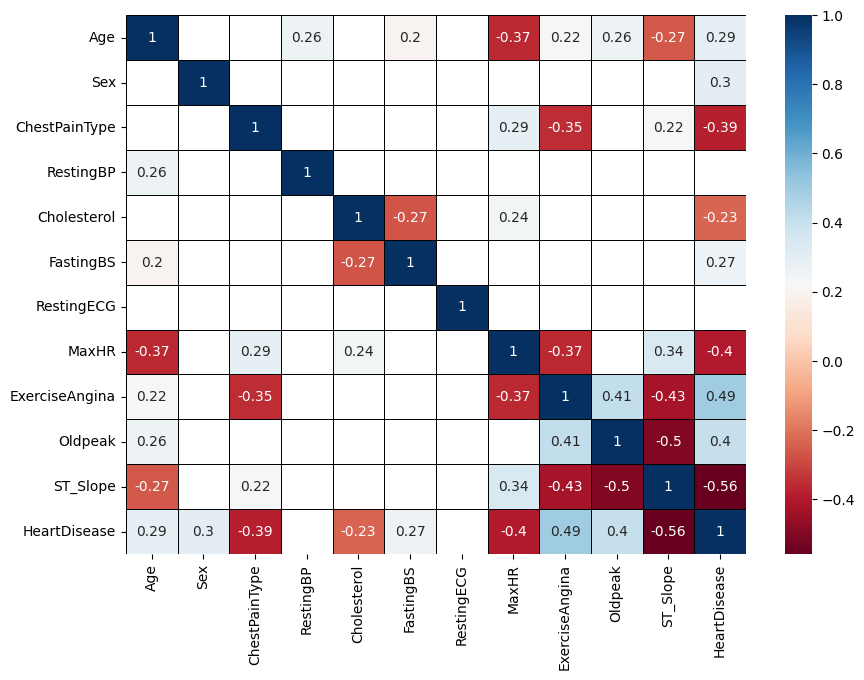

In [109]:
correlation = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot= True, cmap = 'RdBu',linecolor='k',linewidths=.5, mask=correlation.abs()<0.2)

In [110]:
pd.DataFrame(df.groupby(['Sex','HeartDisease'])['HeartDisease'].count())

HeartDisease
Sex HeartDisease              
0   0                      142
    1                       50
1   0                      267
    1                      456

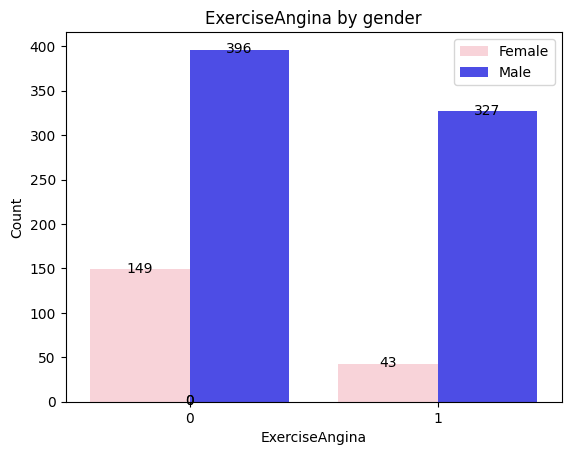

In [111]:
sns.countplot(x='ExerciseAngina', data=df, palette=['pink','blue'],hue='Sex',alpha=.8)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')



plt.xlabel('ExerciseAngina')
plt.ylabel('Count')
plt.title('ExerciseAngina by gender')
plt.legend(['Female','Male'])
plt.show()

### Check Unbalance

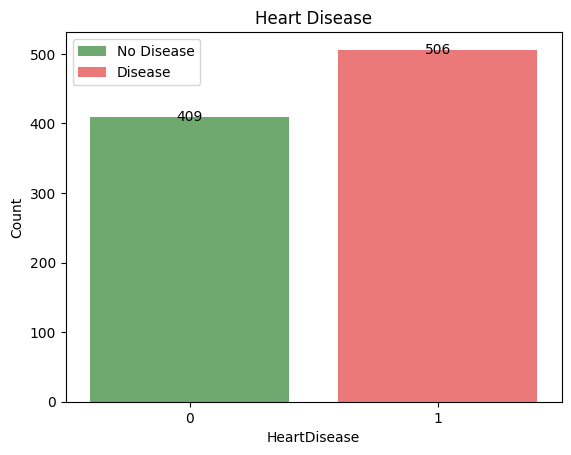

In [112]:
sns.countplot(x='HeartDisease', data=df, palette=['green','red'],alpha=.6)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.title('Heart Disease')
plt.legend(['No Disease','Disease'])
plt.show()

## Treat Unbalance

In [113]:
from collections import Counter
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [114]:
# from imblearn.under_sampling import TomekLinks
# random=TomekLinks()
# x_res,y_res=random.fit_resample(x,y)

In [31]:
#Counter(y_res) #so it can't deleate till reach equall but it become better


### splitting

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.25, random_state=42)

In [33]:
x_train.shape, x_val.shape, x_test.shape

((480, 11), (160, 11), (275, 11))

In [34]:
Accuracy_models=[]
recall_models=[]
f1_score_models=[]
Models_names=[]

#Evaluate Model & check overfitting

In [35]:
def check_overfitting(model,x_train,x_val,x_test,y_train,y_val,y_test):
    y_train_pred=model.predict(x_train)
    y_val_pred=model.predict(x_val)
    y_test_pred=model.predict(x_test)

    Train_accuracy = accuracy_score(y_train,y_train_pred)
    Validaion_accuracy = accuracy_score(y_val,y_val_pred)
    Test_accuracy = accuracy_score(y_test,y_test_pred)

    test_recall_score=recall_score(y_test,y_test_pred)
    test_f1_score =f1_score(y_test,y_test_pred)
    precision_score_test=precision_score(y_test,y_test_pred)

    print(f"-Train accuracy: {Train_accuracy*100:.2f}%")
    print(f"-Validation accuracy: {Validaion_accuracy*100:.2f}%")
    print(f"-Test accuracy: {Test_accuracy*100:.2f}%\n")

    print(f'-Train Recall: {recall_score(y_train,y_train_pred)*100:.2f}%')
    print(f'-Validation Recall: {recall_score(y_val,y_val_pred)*100:.2f}%')
    print(f'-Test Recall: {test_recall_score*100:.2f}%\n')

    print(f'-Train F1_Score: {f1_score(y_train,y_train_pred)*100:.2f}%')
    print(f'-Validation F1_Score: {f1_score(y_val,y_val_pred)*100:.2f}%')
    print(f'-Test F1_Score: {test_f1_score*100:.2f}%\n')


    print(f'-Accuracy: {Test_accuracy*100:.2f}%')
    print(f'-Recall: { test_recall_score*100:.2f}%')
    print(f'-F1_Score: {test_f1_score*100:.2f}%')
    print(f'-Precision: {precision_score_test*100:.2f}%\n\n')

    sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='d')
    plt.show()

    if abs(Validaion_accuracy - Train_accuracy)*100 > 5:
        print(f"-Overfitting with diff: {abs(Validaion_accuracy - Train_accuracy)*100:.2f}%\n")
        print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    else:
        print(f"-Not Overfitting & Recall-score: {test_recall_score*100:.2f}%\n\n")

    recall_models.append(test_recall_score)
    Accuracy_models.append(Test_accuracy)
    f1_score_models.append(test_f1_score)

#[1]- Decision Tree

In [36]:
decision_tree=DecisionTreeClassifier(random_state=42)
params={'criterion':['gini','entropy'], 'max_depth':[4,5,8,10],'ccp_alpha':[.01,.02,.03]}
grid=GridSearchCV(estimator=decision_tree,
                  param_grid=params,
                  cv=5,
                  scoring='recall')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.01, 0.02, 0.03],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 8, 10]},
             scoring='recall')

In [37]:
final_decision_tree=grid.best_estimator_
grid.best_params_

{'ccp_alpha': 0.03, 'criterion': 'gini', 'max_depth': 4}

-Train accuracy: 81.46%
-Validation accuracy: 79.38%
-Test accuracy: 82.55%

-Train Recall: 83.14%
-Validation Recall: 85.23%
-Test Recall: 86.62%

-Train F1_Score: 82.98%
-Validation F1_Score: 81.97%
-Test F1_Score: 85.00%

-Accuracy: 82.55%
-Recall: 86.62%
-F1_Score: 85.00%
-Precision: 83.44%




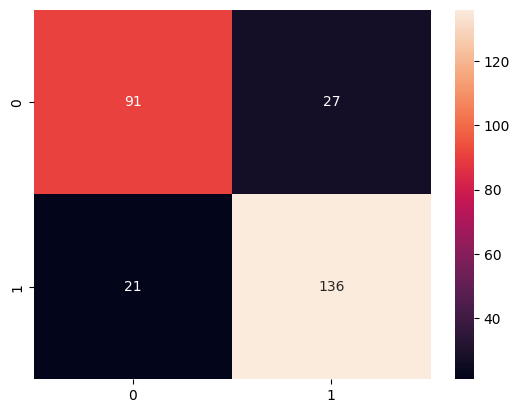

-Not Overfitting & Recall-score: 86.62%




In [38]:
check_overfitting(final_decision_tree,x_train,x_val,x_test,y_train,y_val,y_test)

In [39]:
Models_names.append('Decision Tree')

**Scaling**

In [40]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

#pkl.dump(scaler,open('scaler.pkl','wb'))
# Preferably after Decision Tree
# because scaling decrease the performance of Decision Tree

#[2]-Logistic Regression

In [41]:
lr=LogisticRegression()
params={'multi_class':['ovr','auto'],'C':[0.1,1,10,100],'penalty':['l1','l2']}
grid=GridSearchCV(estimator=lr,
                  param_grid=params,
                  cv=5,
                  scoring='recall')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'multi_class': ['ovr', 'auto'],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [42]:
finall_lr=grid.best_estimator_
grid.best_params_

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2'}

-Train accuracy: 86.25%
-Validation accuracy: 85.00%
-Test accuracy: 84.73%

-Train Recall: 86.97%
-Validation Recall: 87.50%
-Test Recall: 88.54%

-Train F1_Score: 87.31%
-Validation F1_Score: 86.52%
-Test F1_Score: 86.88%

-Accuracy: 84.73%
-Recall: 88.54%
-F1_Score: 86.88%
-Precision: 85.28%




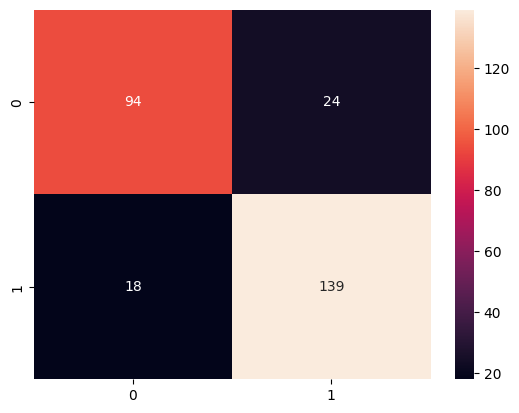

-Not Overfitting & Recall-score: 88.54%




In [43]:
check_overfitting(finall_lr,x_train,x_val,x_test,y_train,y_val,y_test)

In [44]:
Models_names.append('Logistic Regression')

#[3]-SVC

In [45]:
svc = SVC()

skf = StratifiedKFold(n_splits=5)

recall_scores = cross_val_score(estimator=svc,
                                X=x_train,
                                y=y_train,
                                cv=skf,
                                scoring='recall')  # Use recall as the scoring metric

recall_scores

array([0.96153846, 0.92307692, 0.84615385, 0.90384615, 0.8490566 ])

In [46]:
svc.fit(x_train,y_train)

SVC()

-Train accuracy: 91.25%
-Validation accuracy: 86.25%
-Test accuracy: 86.91%

-Train Recall: 94.64%
-Validation Recall: 93.18%
-Test Recall: 92.99%

-Train F1_Score: 92.16%
-Validation F1_Score: 88.17%
-Test F1_Score: 89.02%

-Accuracy: 86.91%
-Recall: 92.99%
-F1_Score: 89.02%
-Precision: 85.38%




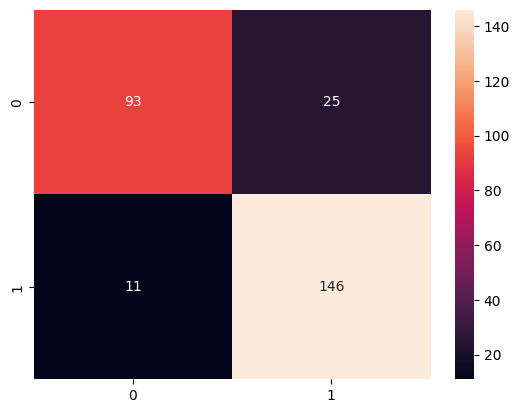

-Not Overfitting & Recall-score: 92.99%




In [47]:
check_overfitting(svc,x_train,x_val,x_test,y_train,y_val,y_test)

In [48]:
Models_names.append('SVC')

#[4]-KNN

In [49]:
knn=KNeighborsClassifier()

params={'n_neighbors':[1,3,5,7,8,9,11,13,15,17],
        'p':[1,2]
        }
grid=GridSearchCV(estimator=knn,
                  param_grid=params,
                  cv=5,
                  scoring='recall')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 8, 9, 11, 13, 15, 17],
                         'p': [1, 2]},
             scoring='recall')

In [50]:
KNN_Modle=grid.best_estimator_
grid.best_params_

{'n_neighbors': 5, 'p': 1}

-Train accuracy: 88.75%
-Validation accuracy: 83.75%
-Test accuracy: 88.00%

-Train Recall: 90.80%
-Validation Recall: 85.23%
-Test Recall: 91.72%

-Train F1_Score: 89.77%
-Validation F1_Score: 85.23%
-Test F1_Score: 89.72%

-Accuracy: 88.00%
-Recall: 91.72%
-F1_Score: 89.72%
-Precision: 87.80%




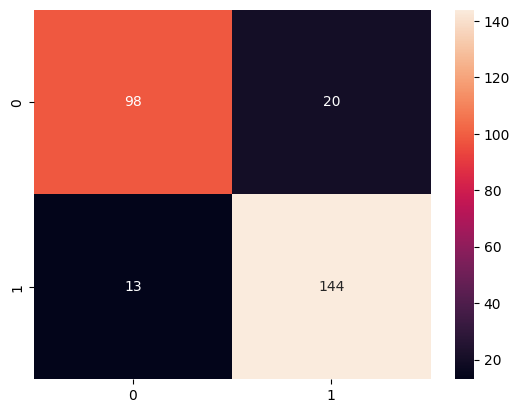

-Not Overfitting & Recall-score: 91.72%




In [51]:
check_overfitting(KNN_Modle,x_train,x_val,x_test,y_train,y_val,y_test)

In [52]:
Models_names.append('KNN')

#[5]-Gaussian NB

In [53]:
GNB=GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid=GridSearchCV(estimator=GNB,
                  param_grid=param_grid,
                  cv=5,
                  scoring='recall')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='recall')

In [54]:
Nave_Modle=grid.best_estimator_
grid.best_params_

{'var_smoothing': 1e-09}

-Train accuracy: 86.46%
-Validation accuracy: 86.25%
-Test accuracy: 85.45%

-Train Recall: 86.21%
-Validation Recall: 88.64%
-Test Recall: 89.17%

-Train F1_Score: 87.38%
-Validation F1_Score: 87.64%
-Test F1_Score: 87.50%

-Accuracy: 85.45%
-Recall: 89.17%
-F1_Score: 87.50%
-Precision: 85.89%




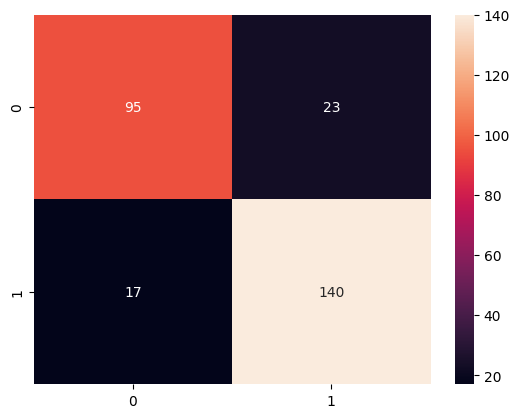

-Not Overfitting & Recall-score: 89.17%




In [55]:
check_overfitting(Nave_Modle,x_train,x_val,x_test,y_train,y_val,y_test)

In [56]:
Models_names.append('Naive_Modle')

#[6]-Random forest

In [57]:
RF=RandomForestClassifier(random_state=42)

param= {
    'n_estimators': [10,50,100,150,200],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,20,30],
    #'min_samples_split': [2, 5, 10],           # Minimum samples to split a node
    #'min_samples_leaf': [1, 2, 4]          # Minimum samples to be at a leaf node

}
grid=GridSearchCV(estimator=RF,
                  param_grid=param,
                  cv=5,
                  scoring='recall',
                  )

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='recall')

In [58]:
Random_F_Model=grid.best_estimator_
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

-Train accuracy: 86.88%
-Validation accuracy: 86.88%
-Test accuracy: 86.18%

-Train Recall: 92.34%
-Validation Recall: 95.45%
-Test Recall: 94.27%

-Train F1_Score: 88.44%
-Validation F1_Score: 88.89%
-Test F1_Score: 88.62%

-Accuracy: 86.18%
-Recall: 94.27%
-F1_Score: 88.62%
-Precision: 83.62%




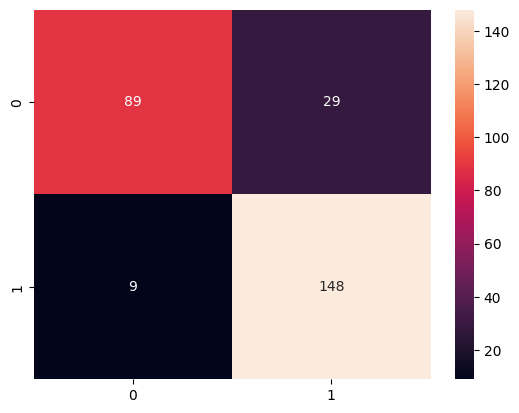

-Not Overfitting & Recall-score: 94.27%




In [59]:
check_overfitting(Random_F_Model,x_train,x_val,x_test,y_train,y_val,y_test)

In [60]:
Models_names.append('Random forest')

#[7]-Gradient_boosting

In [61]:
gradient_boosting=GradientBoostingClassifier(n_estimators=200,
                                            learning_rate=0.001,
                                            max_depth=4,
                                            random_state=42)
gradient_boosting.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.001, max_depth=4, n_estimators=200,
                           random_state=42)

-Train accuracy: 88.75%
-Validation accuracy: 85.00%
-Test accuracy: 85.45%

-Train Recall: 94.25%
-Validation Recall: 93.18%
-Test Recall: 92.99%

-Train F1_Score: 90.11%
-Validation F1_Score: 87.23%
-Test F1_Score: 87.95%

-Accuracy: 85.45%
-Recall: 92.99%
-F1_Score: 87.95%
-Precision: 83.43%




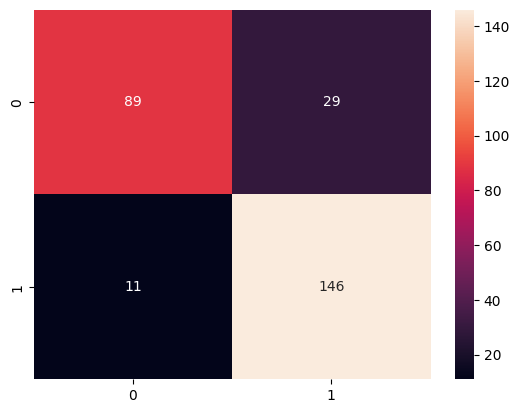

-Not Overfitting & Recall-score: 92.99%




In [62]:
check_overfitting(gradient_boosting,x_train,x_val,x_test,y_train,y_val,y_test)

In [63]:
Models_names.append('Gradient_boosting')

#[8]-xgboost

In [64]:
xgboost=XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.01, random_state=42)
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

-Train accuracy: 86.04%
-Validation accuracy: 83.75%
-Test accuracy: 85.82%

-Train Recall: 92.72%
-Validation Recall: 96.59%
-Test Recall: 95.54%

-Train F1_Score: 87.84%
-Validation F1_Score: 86.73%
-Test F1_Score: 88.50%

-Accuracy: 85.82%
-Recall: 95.54%
-F1_Score: 88.50%
-Precision: 82.42%




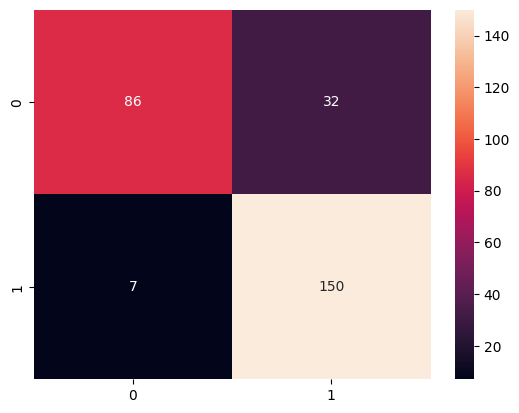

-Not Overfitting & Recall-score: 95.54%




In [65]:
check_overfitting(xgboost,x_train,x_val,x_test,y_train,y_val,y_test)

In [66]:
Models_names.append('xgboost')

#[9]-AdaBoost

In [67]:
adaboost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                            n_estimators=100,
                            learning_rate=0.01,
                            random_state=42)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=100, random_state=42)

-Train accuracy: 81.46%
-Validation accuracy: 79.38%
-Test accuracy: 82.55%

-Train Recall: 83.14%
-Validation Recall: 85.23%
-Test Recall: 86.62%

-Train F1_Score: 82.98%
-Validation F1_Score: 81.97%
-Test F1_Score: 85.00%

-Accuracy: 82.55%
-Recall: 86.62%
-F1_Score: 85.00%
-Precision: 83.44%




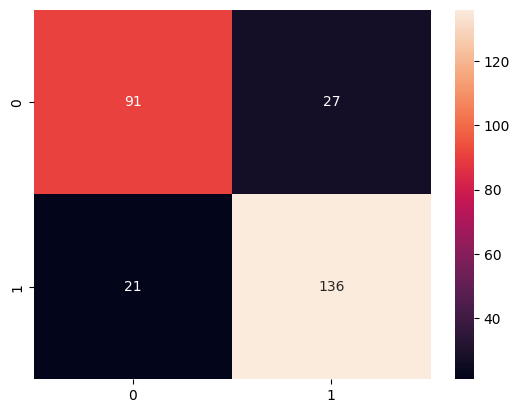

-Not Overfitting & Recall-score: 86.62%




In [68]:
check_overfitting(adaboost,x_train,x_val,x_test,y_train,y_val,y_test)

In [69]:
Models_names.append('AdaBoost')

#[10]-Stacking

In [70]:
from re import X
base_models = [('rf',RandomForestClassifier(max_depth= 4, n_estimators= 40)),
               ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=4, random_state=42))]

meta_model = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.01, random_state=42)
stacking = StackingClassifier(estimators=base_models,
                              final_estimator=meta_model
                              )
stacking.fit(x_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=4,
                                                       n_estimators=40)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           max_depth=4,
                                                           n_estimators=200,
                                                           random_state=42))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_s...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.01,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=2, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...))

-Train accuracy: 88.54%
-Validation accuracy: 86.88%
-Test accuracy: 86.18%

-Train Recall: 95.02%
-Validation Recall: 95.45%
-Test Recall: 93.63%

-Train F1_Score: 90.02%
-Validation F1_Score: 88.89%
-Test F1_Score: 88.55%

-Accuracy: 86.18%
-Recall: 93.63%
-F1_Score: 88.55%
-Precision: 84.00%




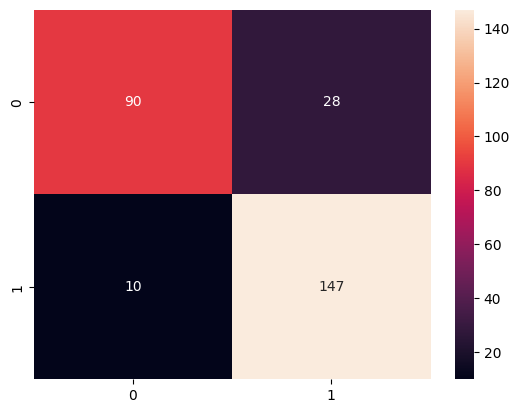

-Not Overfitting & Recall-score: 93.63%




In [71]:
check_overfitting(stacking,x_train,x_val,x_test,y_train,y_val,y_test)

In [72]:
Models_names.append('Stacking')

#**Accuracy Compare**

In [73]:
model_accuracy=pd.DataFrame({'Model':Models_names[:10],'Accuracy':Accuracy_models[:10],'Recall':recall_models[:10],'F1_Score':f1_score_models[:10]}).sort_values(by='Recall',ascending=False)
model_accuracy

,Model,Accuracy,Recall,F1_Score
7,xgboost,0.858182,0.955414,0.884956
5,Random forest,0.861818,0.942675,0.886228
9,Stacking,0.861818,0.936306,0.885542
2,SVC,0.869091,0.929936,0.890244
6,Gradient_boosting,0.854545,0.929936,0.879518
3,KNN,0.880000,0.917197,0.897196
4,Naive_Modle,0.854545,0.891720,0.875000
1,Logistic Regression,0.847273,0.885350,0.868750
0,Decision Tree,0.825455,0.866242,0.850000
8,AdaBoost,0.825455,0.866242,0.850000


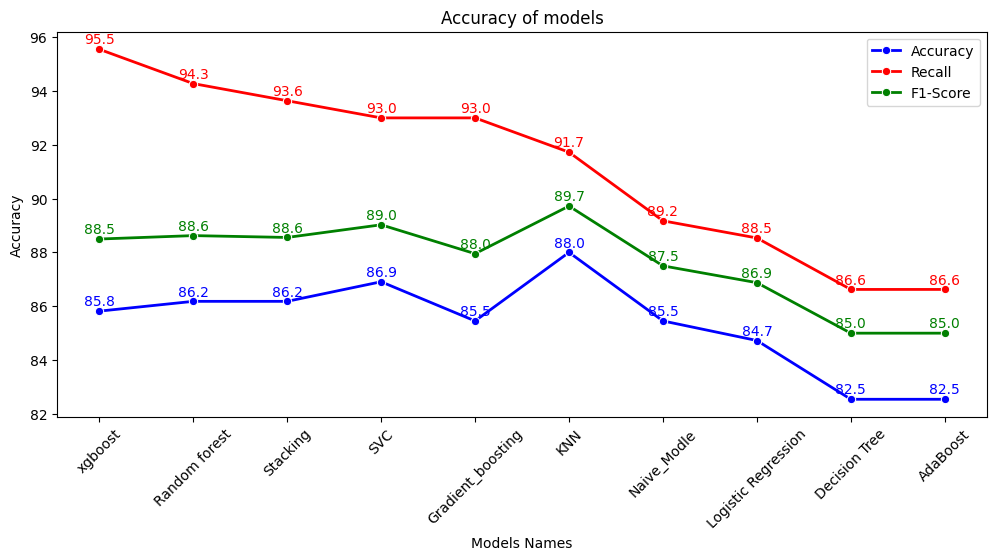

In [74]:
plt.figure(figsize=(12,5))
sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['Accuracy']*100,marker='o',color='b',lw=2,label='Accuracy')
for i, score in enumerate(model_accuracy['Accuracy']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='b')

sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['Recall']*100,marker='o',color='r',lw=2,label='Recall')
for i, score in enumerate(model_accuracy['Recall']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='r')

sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['F1_Score']*100,marker='o',color='g',lw=2,label='F1-Score')
for i, score in enumerate(model_accuracy['F1_Score']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='g')

plt.legend()
plt.xticks(rotation=45)

plt.xlabel('Models Names')
plt.ylabel('Accuracy')
plt.title('Accuracy of models')
plt.show()

In [75]:
best_accuracy= model_accuracy.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)
best_recall=model_accuracy.sort_values(by='Recall',ascending=False).reset_index(drop=True)
best_f1_score=model_accuracy.sort_values(by='F1_Score',ascending=False).reset_index(drop=True)

In [76]:
print(f'Best Accuracy Model: {best_accuracy.Model[0]} With accuracy: {best_accuracy.Accuracy[0]*100:0.2f}%')
print(f'Best Recall Model: {best_recall.Model[0]} With Recall: {best_recall.Recall[0]*100:0.2f}%')
print(f'Best F1_Score Model: {best_f1_score.Model[0]} With F1_Score: {best_f1_score.F1_Score[0]*100:0.2f}%')

Best Accuracy Model: KNN With accuracy: 88.00%
Best Recall Model: xgboost With Recall: 95.54%
Best F1_Score Model: KNN With F1_Score: 89.72%


In [77]:
# models=[final_decision_tree, finall_lr, svc, KNN_Modle, Nave_Modle, Random_F_Model, gradient_boosting, xgboost, adaboost, stacking]
# names=['Decision_Tree', 'Logistic_Regression','SVC', 'KNN', 'Naive_bayes', 'Random_forest', 'Gradient_boosting', 'xgboost', 'AdaBoost', 'Stacking']
# for model,name in zip(models,names):
#     pkl.dump(model,open(f'{name}.pkl','wb'))

In [78]:
Models_names

['Decision Tree',
 'Logistic Regression',
 'SVC',
 'KNN',
 'Naive_Modle',
 'Random forest',
 'Gradient_boosting',
 'xgboost',
 'AdaBoost',
 'Stacking']